# ML examples using `sklearn` and `gym`

In this exercise you will see how to use library implementations ML algorithms in the following settings:

- Classification.

- Regression.

- Clustering.

- Reinforcement Learning

You are expected to go through the code while referencing the relevant API documentation in [sklearn](https://scikit-learn.org/stable/). It might be useful to modify the code or parameters so you can better understand how it works.

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

## Classification with k-Nearest Neighbors algorithm

[Nearest neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Toy dataset preparation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


name = "Nearest Neighbors"

classifier = KNeighborsClassifier(5)

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                           random_state = 1, n_clusters_per_class = 1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)
linearly_separable = (X, y)

X, y = make_moons(noise = 0.3, random_state = 0)

# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.4, random_state = 42)
normalizer = StandardScaler()
normalizer.fit(X_train)

X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Set step size in the mesh.
h = .02
# Create a mesh [x_min, x_max] x [y_min, y_max] with step size h.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### Train & Test

In [44]:
# Train classifier and compute accuracy on test data.
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print('Accuracy on test data:', 100 * score)

# Estimate class probabilities for each point in the mesh.
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Accuracy on test data: 97.5


### Plot decision boundaries

In [45]:
# Put the result into a color plot showing decision boundaries.
# For that, we will assign a color to each point in the mesh.
def plot_boundaries(xx, yy, Z, score, name):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               marker='^', edgecolors='k', alpha=0.3)

    # Plot the testing points.
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=1)

    # Finish the plot.
    plt.xlim([xx.min(), xx.max()])
    plt.ylim([yy.min(), yy.max()])
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size = 15, horizontalalignment = 'right')

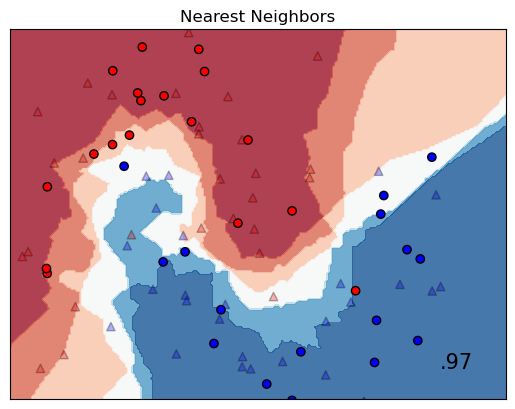

In [46]:
plot_boundaries(xx, yy, Z, score, name)

## Classification with Neural Networks

[Neural Network Models](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [89]:
from sklearn.neural_network import MLPClassifier

name = "NN classifier"

# Train a NN with one hidden layer of size 100, for 10,000 epochs,
# with an adaptive learning rate, and an L2 decay of 0.001.
nn = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', random_state = 1, 
                   max_iter = 2000, shuffle = False, tol = 0.0001, alpha = 0.001, 
                   learning_rate = 'adaptive')
nn_clf = nn.fit(X_train, y_train)

# Compute accuracy on training examples.
score = nn_clf.score(X_test, y_test)
print('Accuracy on test data:', str(100 * score) + '%')

Accuracy on test data: 95.0%


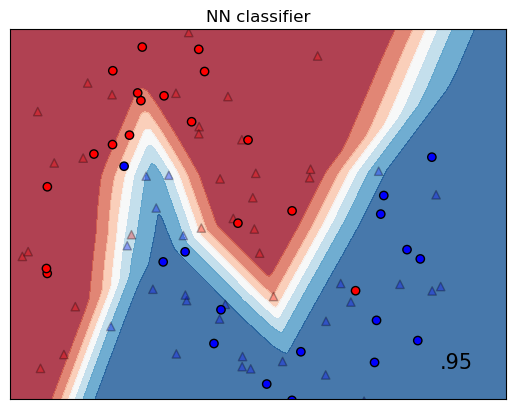

In [90]:
# Estimate class probabilities for each point in the mesh.
Z = nn_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

plot_boundaries(xx, yy, Z, score, name)

## Regression with Support Vector Regression (SVR)

[SVR class in sklearn](https://scikit-learn.org/0.16/modules/generated/sklearn.svm.SVR.html)

### Toy dataset

In [92]:
from sklearn.svm import SVR

# Generate 40 samples uniformly at random in [0, 5].
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
t = np.sin(X).ravel()

# #############################################################################
# Add noise to every other 5 samples.
t[::5] += 3 * (0.5 - np.random.rand(8))

### Train & Test

In [94]:
# Create SVR regression model.
svr = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)

# Fit regression model.
svr.fit(X, t)

# Predict target values.
y = svr.predict(X)

### Plot examples and learned target function

Text(0, 0.5, 'target')

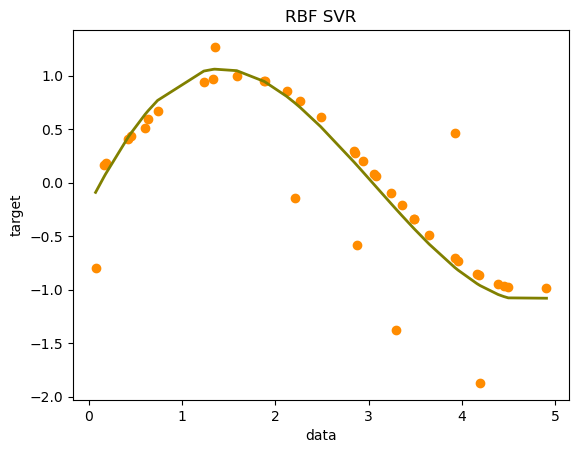

In [97]:
# Plot 
plt.scatter(X, t, color = 'darkorange', label = 'data')
plt.plot(X, y, color = "olive", lw = 2, label = name)
plt.title("RBF SVR")
plt.xlabel('data')
plt.ylabel('target')

## Clustering with k-Means

[Clustering in sklearn](https://scikit-learn.org/stable/modules/clustering.html)

[Mini Batch K-Means documentation](https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)

[MiniBatchKMeans API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)

### Toy dataset

In [99]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
X, y = datasets.make_moons(n_samples = n_samples, noise = .05)

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

## Train & Test

In [108]:
# Create cluster objects.
kmeans = cluster.MiniBatchKMeans(n_clusters = 2, n_init='auto')

%time        
kmeans.fit(X)

if hasattr(kmeans, 'labels_'):
    y_pred = kmeans.labels_.astype(int)
else:
    y_pred = kmeans.predict(X)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 16.9 µs


## Plot samples and clusters

([], [])

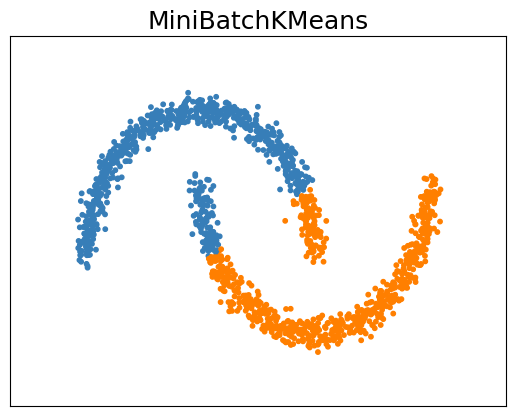

In [109]:
plt.title('MiniBatchKMeans', size=18)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())

## Clustering with SpectralClustering

[Spectral clustering documentation](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering)

[SpectralClustering API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

### Train & Test

In [110]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters = 2, assign_labels = 'discretize', 
                        affinity="nearest_neighbors", random_state = 0)

%time

sc.fit(X)

y_pred = sc.labels_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


/Users/rbunescu/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## Plot samples and clusters

([], [])

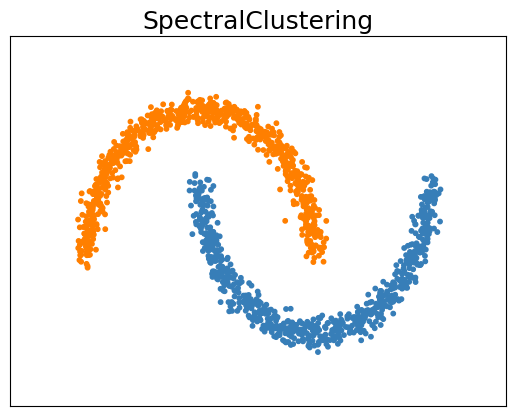

In [111]:
plt.title('SpectralClustering', size=18)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())

# Reinforcement Learning

You need to install OpenAI Gymnasium for this exercise by running `pip install gymnasium` on terminal. 
Please check [this link](https://github.com/Farama-Foundation/Gymnasium) to directly access to the GitHub repo. 

## Environment: MountainCar

In [39]:
# https://gymnasium.farama.org/
import gymnasium as gym

ACTIONS = ['<-', '  ', '->']

def show_state(env, step=0, a=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title("%s [Step: %d]" % (ACTIONS[a], step))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())


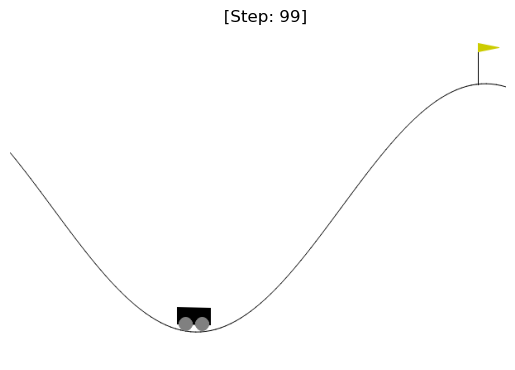

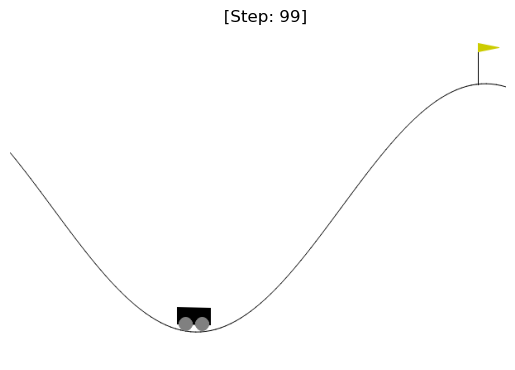

In [40]:
import time 

env = gym.make('MountainCar-v0', render_mode="rgb_array")

# Number of steps you run the agent for 
num_steps = 100

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, trunc, info = env.step(action)
    
    # Render the env
    show_state(env, step, action)

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

## Train

In [56]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [104]:
env.action_space.n

3

In [ ]:
DISCRETE_OBSERVATION_SPACE_SIZE = [
    20] * len(env.observation_space.high)  # will give out 20*20 list

# see how big is the range for each of the 20 different buckets
discrete_os_win_size = (env.observation_space.high -
                        env.observation_space.low) / DISCRETE_OBSERVATION_SPACE_SIZE

LEARNING_RATE = 0.1
DISCOUNT = 0.95  # how important we find the new future actions are ; future reward over current reward
EPISODES = 500

# even though the solution might have been found, we still wish to look for other solutions
epsilon = 0.5  # 0-1 ; higher it is, more likely for it to perform something random action
START_EPSILON_DECAYING = 1
# python2 style division - gives only int values
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Q learning
# so we will have now a table such that each row will have 400 (20*20) rows for the possible state the agent can be in
# and 3 columns for the 3 possible actions
# the agent will see which state it is in and take the action corresponding to the largest Q value

# Create a randomised q_table and agent will update it after exploring the environment
q_table = np.random.uniform(
    low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))

# how to set low and high limits of rewards ? - if you see the rewards printed in below cell, they are mostly -1 and
# might be something +ve only when you reach goal. Needs tweaking and playing around
# print(q_table.shape)


def get_discrete_state(state):
    if isinstance(state, tuple):
        state = state[0]
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # return as tuple


epsilon_log = []
reward_log = []

for ep in range(EPISODES):
    done = False
    discrete_state = get_discrete_state(env.reset())  # initial discrete state

    sum_reward = 0
    while not done:  # goal reached means reward = 0

        if np.random.random() > epsilon:
            # in this environment, 0 means push the car left, 1 means to do nothing, 2 means to push it right
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        # Run one timestep of the environment's dynamics;  returns a tuple (observation, reward, done, info).
        new_state, reward, done, _, _ = env.step(action)
        sum_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if not done:
            # max q value for the next state calculated above
            max_future_q = np.max(q_table[new_discrete_state])

            # q value for the current action and state
            current_q = q_table[discrete_state + (action, )]

            new_q = (1 - LEARNING_RATE) * current_q + \
                LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # based on the new q, we update the current Q value
            q_table[discrete_state + (action, )] = new_q

        # goal reached; reward = 0 and no more negative
        elif new_state[0] >= env.goal_position:
            # its like a snowbal effect, once the goal is reached - it will most likely reach again soon enough
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    epsilon_log.append(epsilon)
        
    reward_log.append(sum_reward)

env.close()

## Results

Text(0, 0.5, 'epsilon')

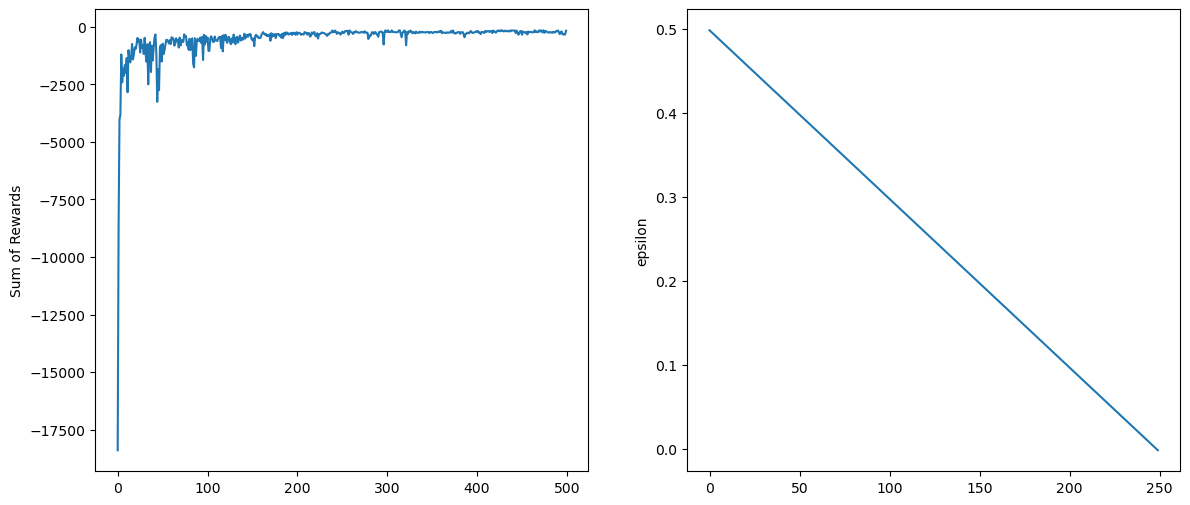

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(reward_log)
plt.ylabel("Sum of Rewards")

plt.subplot(1,2,2)
plt.plot(epsilon_log)
plt.ylabel("epsilon")


## Test

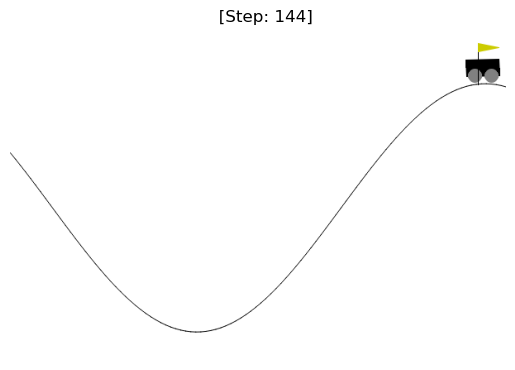

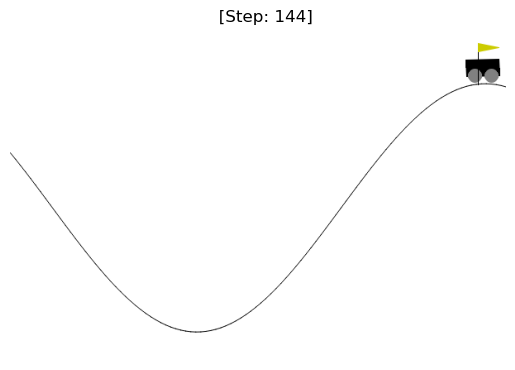

In [53]:
# Number of steps you run the agent for 
num_steps = 1000

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    #action = env.action_space.sample()
    #>>>>>>>>>
    discrete_state = get_discrete_state(obs)
    action = np.argmax(q_table[discrete_state])
    
    # apply the action
    obs, reward, done, trunc, info = env.step(action)
    
    # Render the env
    show_state(env, step, action)

    # Wait a bit before the next frame unless you want to see a crazy fast video
    #time.sleep(0.00001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()
        break

# Close the env
env.close()